In [1]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446' -O 'DIP_HW2.zip'
!unzip DIP_HW2.zip

--2023-12-05 18:11:08--  https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445128 (435K) [application/octet-stream]
Saving to: ‘DIP_HW2.zip’

DIP_HW2.zip         100%[===================>] 434.70K  --.-KB/s    in 0.09s   

2023-12-05 18:11:09 (4.61 MB/s) - ‘DIP_HW2.zip’ saved [445128/445128]

Archive:  DIP_HW2.zip
replace Blur_Hand.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Blur_Hand.png           
  inflating: Hand.png                
  inflating: noisy_brain.png         


# Imports




In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

# Any Helper Functions


In [3]:
def image_show(ax, image, title, vmin=0, vmax=255, cmap='gray'):
    ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis('off') # Hide axis labels
    ax.set_title(title, color='white', backgroundcolor='green')

def image_show2(image, title, vmin=0, vmax=255, cmap='gray', figsize=(6, 4)):
    plt.figure(figsize=figsize) # Set figure size
    plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off') # Hide axis labels
    plt.title(title, color='white', backgroundcolor='green') # Set title
    plt.show()

# Question 5: Low Pass Filters (30%)

In [4]:
#@title Q5 - Part 1 (5%)
image1 = cv2.imread('noisy_brain.png', cv2.IMREAD_GRAYSCALE)

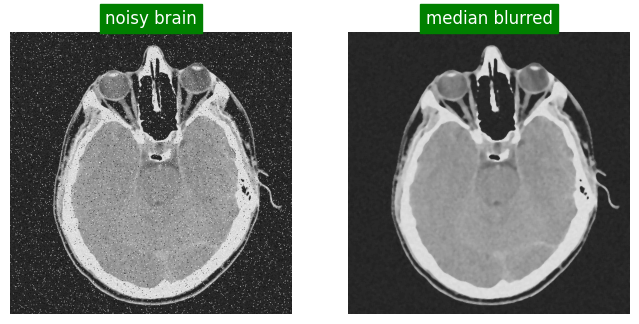

In [5]:
#@title Q5 - Part 2 (10%)
# The median filter performs well when we have a salt-and-pepper noise
median_blurred_image1 = cv2.medianBlur(image1, ksize=5)

# Show images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show(ax[0], image1, 'noisy brain')
image_show(ax[1], median_blurred_image1, 'median blurred')
fig.show()

In [6]:
#@title Q5 - Part 3 (10%)

# NO CODE REQUIRED FOR THIS PART.

<div dir=rtl><font color='green' size="5">جواب سوال ۵-۳</font>
<div>

<div dir=rtl><font size="4">
علت عمل padding:

1. وقتی تبدیل فوریه یک تصویر را می گیریم، اساساً سهم فرکانس های مختلف در تصویر را محاسبه می کنیم. اگر تصویر به اندازه کافی دارای لایه صفر نباشد، می تواند مصنوعات دوره ای را ایجاد کند که به نام aliasing شناخته می شوند. قرار دادن صفر در اطراف تصویر به حداقل رساندن این مصنوعات کمک می کند.
2. برخورد با شرایط مرزی دوره ای: تبدیل فوریه فرض می کند که سیگنال در حال تبدیل تناوبی است. اگر تصویر این شرایط را نداشته باشد، تناوب مصنوعی با تکرار تصویر در حوزه فضایی معرفی می‌شود که از طریق padding می‌توان به آن دست یافت.

علت Centering:
1. اجزای فرکانس در گوشه ها: نتیجه تبدیل فوریه استاندارد دارای مولفه های فرکانس پایین (یا اجزای DC) در گوشه های تصویر تبدیل شده است. برای تفسیر و تجسم بهتر محتوای فرکانس، این مؤلفه ها به مرکز منتقل می شوند.
2. فیلتر کردن را ساده می کند: وقتی عملیاتی مانند فیلتر کردن یا اصلاح محتوای فرکانس یک تصویر را انجام می دهیم، داشتن فرکانس های پایین در مرکز، طراحی فیلترها را آسان تر می کند. این به این دلیل است که در مرکز، اجزای فرکانس پایین و بالا را داریم که این امکان را می دهد که به راحتی آنها را دستکاری کنیم.

 </font><br />
</div>

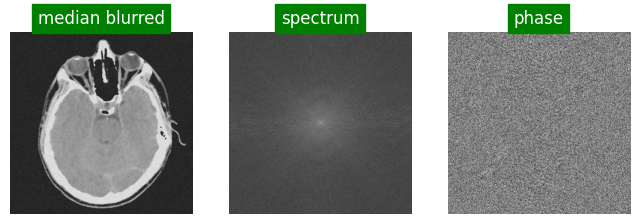

In [7]:
#@title Q5 - Part 4 (25%)
# Perform DFT
dft = cv2.dft(np.float32(median_blurred_image1), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency components to the center
dft_shifted = np.fft.fftshift(dft)

# Extract magnitude and phase images
mag, phase = cv2.cartToPolar(dft_shifted[:,:,0], dft_shifted[:,:,1])

# Get spectrum for viewing only
spec = 10 * np.log(mag)
phase_stretched = cv2.normalize(phase, None, 0, 255, cv2.NORM_MINMAX)

# Values larger than 1 increase contrast; values smaller than 1 decrease contrast
mag = cv2.pow(mag, 1.1)

# Show image
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
image_show(ax[0], median_blurred_image1, 'median blurred')
image_show(ax[1], spec, 'spectrum')
image_show(ax[2], phase_stretched, 'phase')
fig.show()

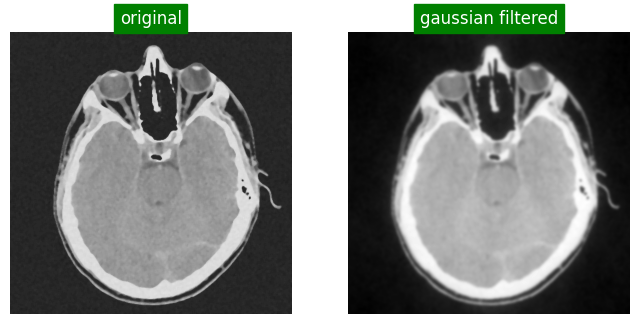

In [8]:
#@title Q5 - Part 5 (30%)
def gaussian_2d_frequency_domain(A, shape, mu_x, mu_y, sigma_x, sigma_y):
    # shape: Gaussian function rows and cols
    # mu_x: Mean along the x-axis
    # mu_y: Mean along the y-axis
    # sigma_x: Standard deviation along the x-axis
    # sigma_y: Standard deviation along the y-axis
    rows, cols = shape
    u = np.fft.fftfreq(rows)
    v = np.fft.fftfreq(cols)
    u, v = np.meshgrid(u, v)

    gaussian = A * np.exp(-np.pi * ((sigma_x**2) * (u - mu_x)**2 + (sigma_y**2) * (v - mu_y)**2))
    gaussian = np.fft.fftshift(gaussian) # centered

    return gaussian

# Convert magnitude and phase into cartesian real and imaginary components
real, imag = cv2.polarToCart(mag, phase)

# To better visualize the Gaussian filter in the frequency domain, we have put the A = 250
gaussian_filter = gaussian_2d_frequency_domain(250, real.shape, 0, 0, 5, 5)

# Filter
real *= gaussian_filter
imag *= gaussian_filter

# Combine cartesian components into one complex image
back = cv2.merge([real, imag])

# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(back)

# do idft saving as complex output
img_back = cv2.idft(back_ishift)

# combine complex components into original image again
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 0])

# re-normalize to 8-bits
min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Show images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show(ax[0], median_blurred_image1, 'original')
image_show(ax[1], img_back, 'gaussian filtered')
fig.show()

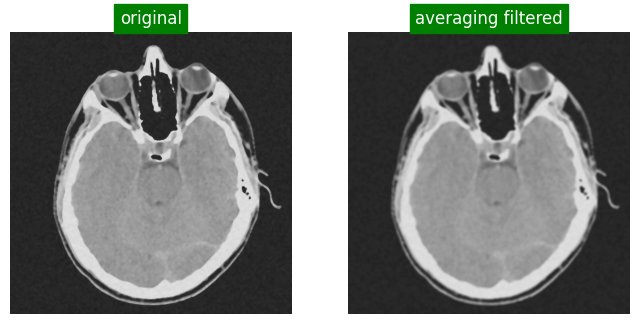

In [9]:
#@title Q5 - Part 6 (10%)
averaging_image1 = cv2.GaussianBlur(median_blurred_image1, ksize=(5, 5), sigmaX=3)

# Show images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show(ax[0], median_blurred_image1, 'original')
image_show(ax[1], averaging_image1, 'averaging filtered')
fig.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۶</font>
<div>
<font size="4">
همانطور که واضح است تصویر تار شده است و عمل smoothing رخ داده است. درواقع نویز در تصویر پخش شده است
 </font><br />
</div>

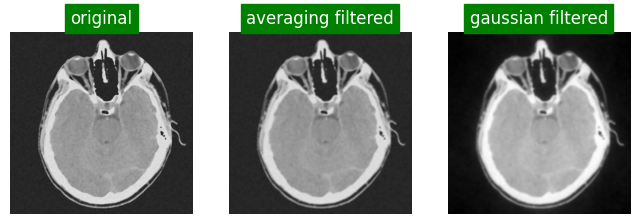

In [10]:
#@title Q5 - Part 7 (10%)
# Show images
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
image_show(ax[0], median_blurred_image1, 'original')
image_show(ax[1], averaging_image1, 'averaging filtered')
image_show(ax[2], img_back, 'gaussian filtered')
fig.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۷</font>
<div>
<font size="4">
میانگین وزنی:
یک فیلتر گاوسی وزن های متفاوتی را برای هر پیکسل در همسایگی بر اساس فاصله آن از مرکز اعمال می کند. این میانگین وزنی اجازه می دهد تا تاکید بیشتری بر پیکسل های مرکزی و کمتر بر پیکسل های اطراف داشته باشید. در مقابل، یک فیلتر میانگین گیر به همه پیکسل‌های همسایه وزن یکسانی می‌دهد، که ممکن است برای حفظ جزئیات دقیق یا کنترل لبه‌ها ایده‌آل نباشد.

حفظ لبه:
فیلترهای گاوسی در حفظ لبه ها در تصویر بهتر عمل می کنند. ماهیت وزنی فیلتر گاوسی، وزن های کمتری را به پیکسل های دورتر از مرکز اختصاص می دهد و در نتیجه انتقال نرم تر در لبه ها ایجاد می شود. در مقابل، فیلتر میانگین گیر تمایل دارند لبه ها را بیشتر محو کنند که منجر به کاهش وضوح تصویر می شود.

کاهش نویز:
فیلترهای گاوسی در کاهش نویز فرکانس بالا در یک تصویر موثر هستند. اثر هموارسازی فیلتر گاوسی با توجه به فرکانس مکانی توزیع می‌شود و کمتر احتمال دارد که مصنوعات مرتبط با فیلترهای میانگین‌گیری را معرفی کند.فیلترهای میانگین‌گیری، در حالی که نویز را تا حدی کاهش می دهد، ممکن است در حفظ جزئیات در حضور نویز موثر نباشد. </font><br />
</div>

# Question 6: High Pass Filters (30%)

In [11]:
#@title Q6 - Part 1 (15%)
def isotropic_laplacian(image, kernel, degree=45):
    alpha = (degree == 90)
    laplacian_kernel = np.array([[alpha, 1, alpha], [1, -kernel, 1], [alpha, 1, alpha]])

    return cv2.filter2D(image, -1, laplacian_kernel)

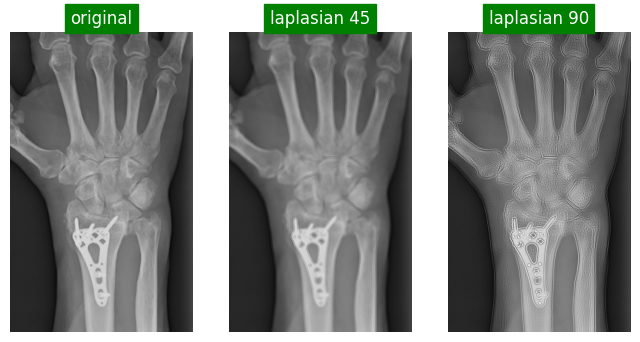

In [12]:
#@title Q6 - Part 2 (15%)
image2 = cv2.imread('Hand.png', cv2.IMREAD_GRAYSCALE)

isotropic_laplacian_45 = isotropic_laplacian(image2, 3, 45)
isotropic_laplacian_90 = isotropic_laplacian(image2, 7, 90)

# Show images
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
image_show(ax[0], image2, 'original')
image_show(ax[1], isotropic_laplacian_45, 'laplasian 45')
image_show(ax[2], isotropic_laplacian_90, 'laplasian 90')
fig.show()

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۶-۲</font>
<div>

<div dir=rtl><font size="4">
در حالتی که لاپلاسین ۴۵ درجه میگیریم فقط لبه های افقی و عمودی را مشتق گیری میکنیم و تیز تر میشوند، اما درحالتیکه زاویه را ۹۰ درجه میگیریم، لبه های مورب نیز تیز تر میشوند
 </font><br />
</div>

In [13]:
#@title Q6 - Part 3 (40%)
def do_filter(image, filter_name, details):
    # Fourier Transform
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    # Get filter
    if filter_name == 'IHPF':
        H = IHPF(image, details)
    else:
        H = BHPF(image, details)

    # Do filter
    Gshift = Fshift * H

    # Inverse Fourier Transform
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))

    # re-normalize to 8-bits
    min, max = np.amin(g, (0,1)), np.amax(g, (0,1))
    g = cv2.normalize(g, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return g

def IHPF(image, details):
    M, N = image.shape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= details.get('D0'):
                H[u,v] = 1
            else:
                H[u,v] = 0
    H = 1 - H

    return H

def BHPF(image, details):
    M, N = image.shape
    H = np.zeros((M,N), dtype=np.float32)

    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u, v] = 1 / (1 + (D / details.get('D0'))**(2*details.get('n')))

    return H

In [14]:
#@title Q6 - Part 4 (15%)
IHPF_50_image2 = do_filter(image2, 'IHPF', {'D0': 50})
IHPF_100_image2 = do_filter(image2, 'IHPF', {'D0': 100})

BHPF_50_image2 = do_filter(image2, 'BHPF', {'D0': 50, 'n':2})
BHPF_100_image2 = do_filter(image2, 'BHPF', {'D0': 100, 'n':2})

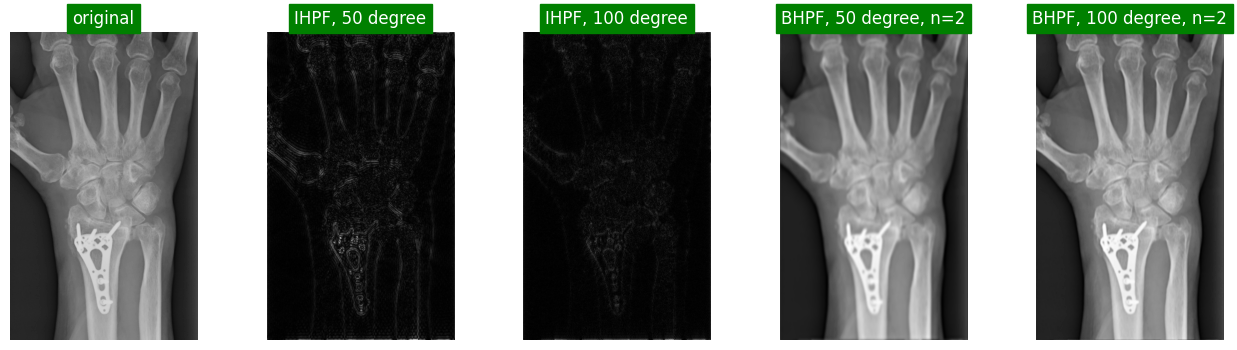

In [15]:
# Show images
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
image_show(ax[0], image2, 'original')
image_show(ax[1], IHPF_50_image2, 'IHPF, 50 degree')
image_show(ax[2], IHPF_100_image2, 'IHPF, 100 degree')
image_show(ax[3], BHPF_50_image2, 'BHPF, 50 degree, n=2')
image_show(ax[4], BHPF_100_image2, 'BHPF, 100 degree, n=2')
fig.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۶-۴</font>
<div>
<font size="4">
برخلاف حالت ایده آل که ringing داریم، در حالت باترورث اعوجاجات رخ نداده است. بعلاوه تغییر ناگهانی در فیلتر هم نداریم برخلاف حالت ایده آل. خروجی حالت باتروث مشاهده میشود که جزئیات را بهتر نمایش داده است درحالیکه در حالت ایده آل یک کات آف سفت و سخت داریم. افزایش شعاع بالاگذر باعث میشود که فرکانس‌های بیشتری را داشته باشیم و تصویر واضح تر است. </font><br />
</div>

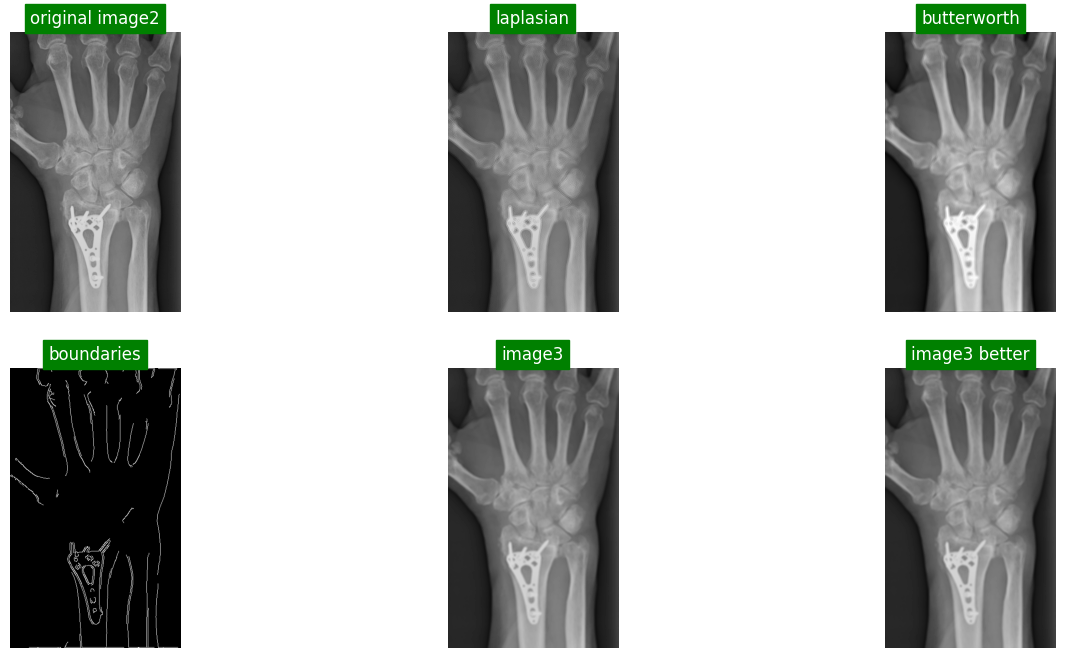

In [16]:
#@title Q6 - Part 5 (15%)
image3 = cv2.imread('Blur_Hand.png', cv2.IMREAD_GRAYSCALE)

laplasian_image2 = isotropic_laplacian(image2, 3, 45)

butterworth_laplasian_image2 = do_filter(laplasian_image2, 'BHPF', {'D0': 100, 'n':2})

boundaries = cv2.Canny(butterworth_laplasian_image2, 50, 150)

better_image3 = image3 + boundaries

fig, ax = plt.subplots(2, 3, figsize=(16, 8))
image_show(ax[0][0], image2, 'original image2')
image_show(ax[0][1], laplasian_image2, 'laplasian')
image_show(ax[0][2], butterworth_laplasian_image2, 'butterworth')
image_show(ax[1][0], boundaries, 'boundaries')
image_show(ax[1][1], image3, 'image3')
image_show(ax[1][2], better_image3, 'image3 better')
fig.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۶-۵</font>
<div>
<font size="4">
در قسمت مرزها سعی میکنیم که اختلاف به شدت‌ها را زیاد کنیم و به همین دلیل از unsharp masking استفاده میکنیم و دیده میشود که در مرزها تمایز بین شدت ها بیشتر است. بعلاوه اینکه با فیلتر های زده شده وضوح تصویر نهایی بهتر شده است
 </font><br />
</div>